# Import necessary libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# EDA

load the dataset

In [28]:
data = pd.read_csv("/content/insurance.csv")

In [29]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [30]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [32]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Visualization

Visualize the distribution of numerical variables

<function matplotlib.pyplot.show(close=None, block=None)>

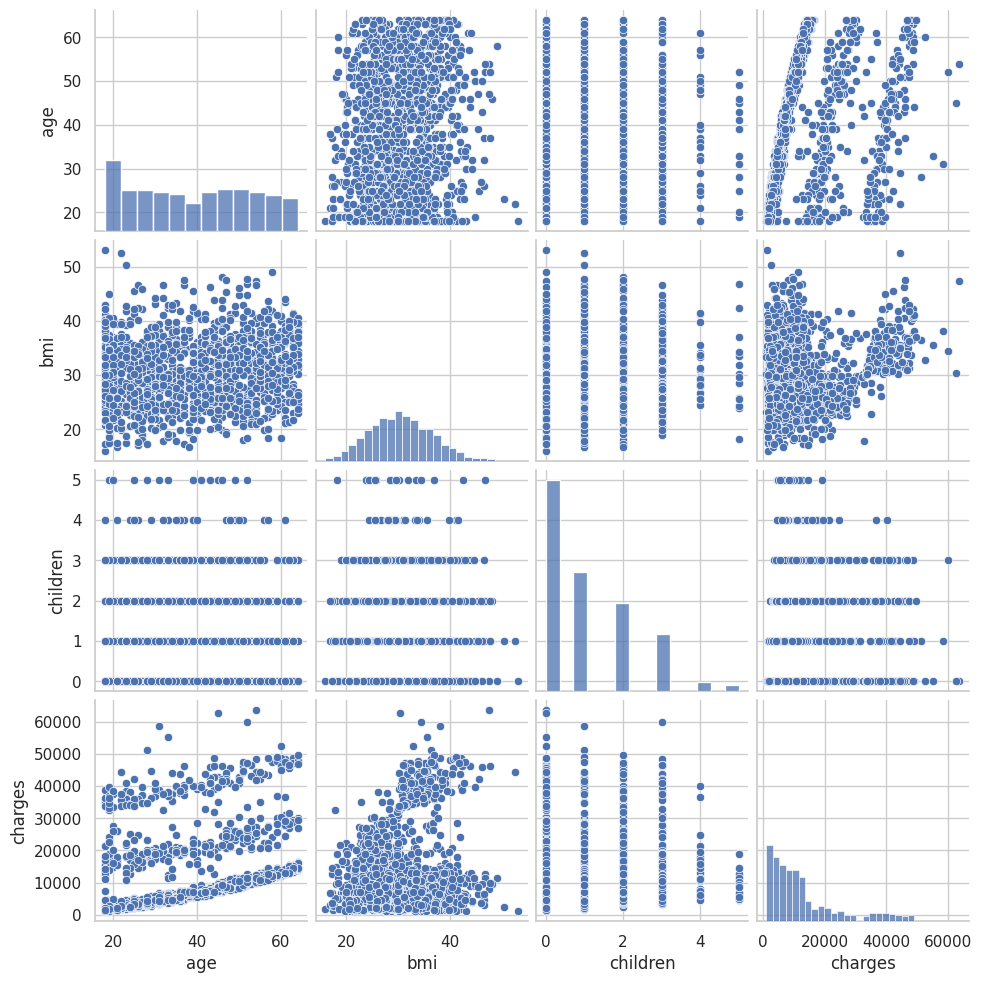

In [33]:
sns.pairplot(data[['age', 'bmi', 'children', 'charges']])
plt.show

Visualize the relationship between categorical varbiales and charges

<function matplotlib.pyplot.show(close=None, block=None)>

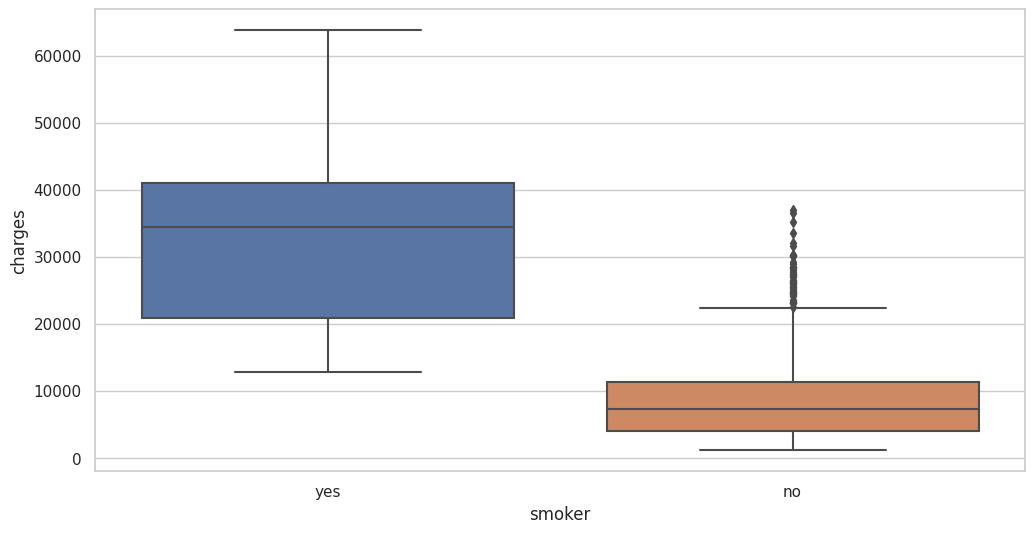

In [34]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='smoker', y='charges', data=data)
plt.show

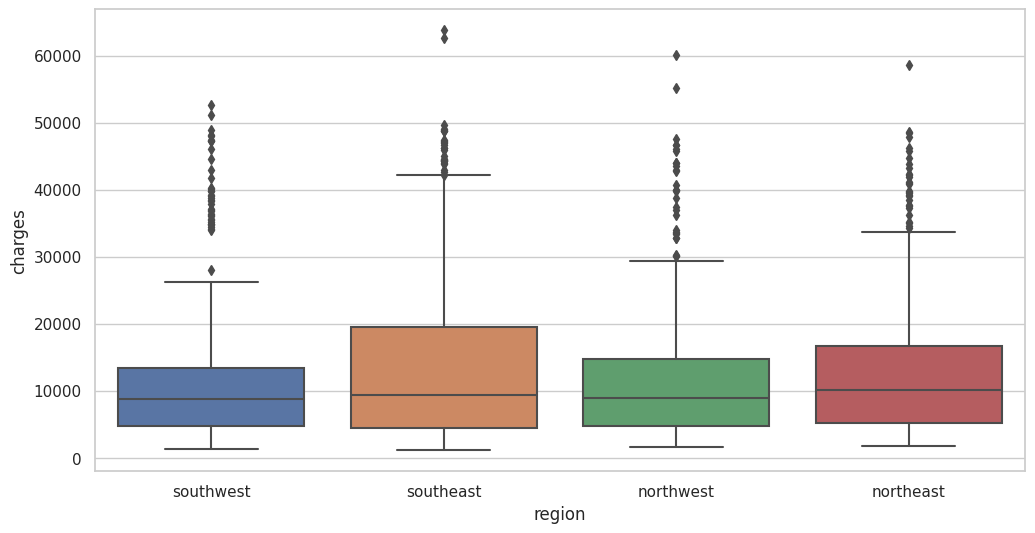

In [35]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='region', y='charges', data=data)
plt.show()

# Preprocessing

Convert the categorical variables to numerical using one-hot encoding

In [36]:
data = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)

In [37]:
data.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


Split the data into training and testing sets

In [38]:
X = data.drop('charges', axis=1)
y = data['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Model Building and Training

In [39]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Make predictions on the test set

In [40]:
y_pred = model.predict(X_test)

# Model Evaluation

In [41]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [42]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 35479352.80730363
R-squared: 0.7623311844057112


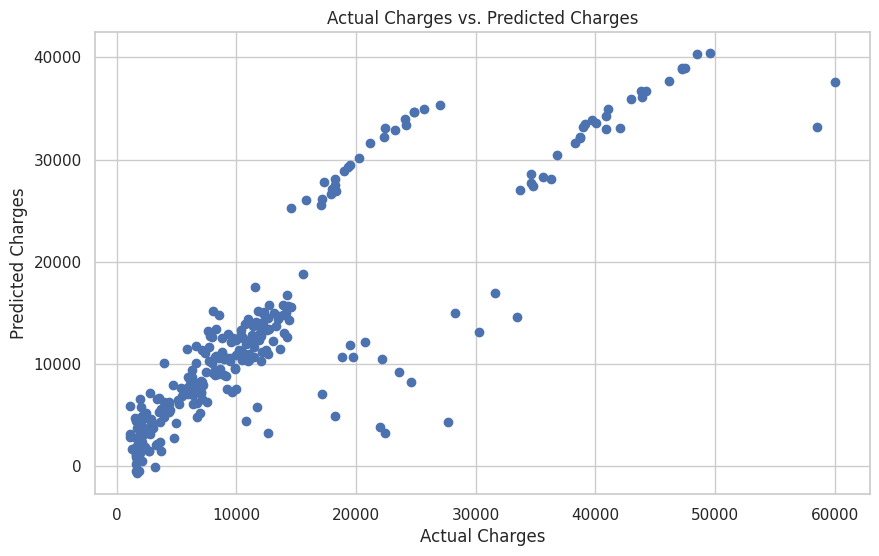

In [43]:
# Visualize the predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual Charges vs. Predicted Charges")
plt.show()

In [45]:
# Using pickle, save the model
import pickle

with open('InsuraLin.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)